### Условие
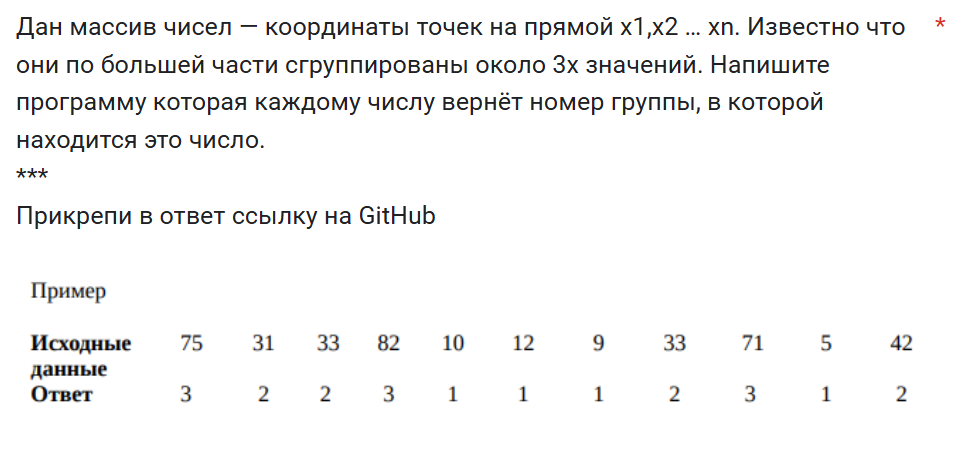

In [53]:
x_arr = [75, 31, 33, 82, 10, 12, 9, 33, 71, 5, 42] # list(map(int, input().split()))

1. Вариант решения
- Находим max и min
- Разбиваем группу чисел на 3 массива:
    - 1) min, min + (max - min) / 3
    - 2) min + (max - min) / 3, min + 2* (max - min) / 3
    - 3) min + 2* (max - min) / 3, max

In [54]:
max_value, min_value = max(x_arr), min(x_arr)
scope_arr = max_value - min_value

answer_arr = []

for elem in x_arr:
    if elem < min_value + scope_arr / 3:
        answer_arr.append('1')
    elif elem < min_value + 2 * scope_arr / 3:
        answer_arr.append('2')
    else:
        answer_arr.append('3')

print(' '.join(map(str, x_arr)))
print(' '.join(answer_arr))

75 31 33 82 10 12 9 33 71 5 42
3 2 2 3 1 1 1 2 3 1 2


### Получили необходимое решение, но что если взглянуть на эту задачу через призму матстата
#### Т.к. в задаче требуется распределить значения на 3 группы, то идеальным решением будет использовать квантили 0.33, 0.66 и 1, которые более точно найдут опорные элементы вокруг которых необходимо образовывать группы.

Получим значения квантелей 0.33, 0.66 и 1

In [55]:
import numpy as np

q = np.quantile(x_arr, [0.333333, 0.666666, 1])
q

array([18.33327, 38.99994, 82.     ])

Теперь для решения нам необходимо будет сравнить растояние по модулю между числом и нашими квантилями, и поместим в выбранную группу число.

In [56]:
answer_arr = []

for elem in x_arr:
    d_q = {
        abs(abs(elem) - abs(q[0])): '1',
        abs(abs(elem) - abs(q[1])): '2',
        abs(abs(elem) - abs(q[2])): '3'
    }
    answer_arr.append(d_q[min(d_q.keys())])

print(' '.join(map(str, x_arr)))
print(' '.join(answer_arr))

75 31 33 82 10 12 9 33 71 5 42
3 2 2 3 1 1 1 2 3 1 2


Вуаля! Получили необходимый результат с более точной выборкой.